<a href="https://colab.research.google.com/github/Daeton1/CIS_2100_project3_v2/blob/main/project_3_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stores with best selling items**
     StoreID BestSellingItem  SalesCount
0  Store_003              TV          12
1  Store_001          Tablet          11
2  Store_002      Smartphone          10

The analysis of individual store sales revealed the top-selling items for three major stores. Store_003 achieved the highest success with the TV, selling 12 units, followed by Store_001, where Tablets dominated sales with 11 units. Store_002 excelled in selling Smartphones, recording 10 sales. These findings highlight how customer preferences can vary significantly between locations, emphasizing the need for store-specific strategies to maximize sales performance.


**Top 10 Best-Selling Items Across the Corporation: **
Product Name
TV            28
Camera        26
Smartphone    25
Tablet        21
Smartwatch    20
Headphones    15
Laptop        13
Name: count, dtype: int64


At the corporate level, TVs emerged as the most popular product, selling 28 units across all stores. Cameras and Smartphones closely followed with 26 and 25 units sold, respectively, while Tablets and Smartwatches rounded out the top five. This data underscores the widespread appeal of versatile electronic products, which collectively account for the majority of sales and reflect broader consumer trends within the corporation.


**Top 5 Frequent Itemsets for Store Store_003:**

**Market basket analysis** at Store_003 revealed that TVs were the most frequently purchased item, appearing in 60% of orders. Other popular items included Smartwatches (53.33%), Smartphones (46.67%), Cameras (33.33%), and Laptops (33.33%). This suggests that customers in this store tend to prefer a mix of entertainment and productivity-related electronics, offering opportunities for targeted promotions.

In Store_001, Cameras led the frequent itemsets, appearing in 60% of orders, followed by TVs at 53.33% and Tablets at 46.67%. Interestingly, combinations such as TVs and Cameras were purchased together in 33.33% of orders, revealing potential bundling opportunities to drive sales further. The high popularity of imaging and display products highlights a specific customer interest in content creation and consumption.





TV - Purchased together in 60.0% of orders.
Smartwatch - Purchased together in 53.33% of orders.
Smartphone - Purchased together in 46.67% of orders.
Camera - Purchased together in 33.33% of orders.
Laptop - Purchased together in 33.33% of orders.


Top 5 Frequent Itemsets for Store Store_001:


Camera - Purchased together in 60.0% of orders.
TV - Purchased together in 53.33% of orders.
Tablet - Purchased together in 46.67% of orders.
TV, Camera - Purchased together in 33.33% of orders.
Smartphone - Purchased together in 33.33% of orders.


Top 5 Frequent Itemsets for Store Store_002:

Smartphone - Purchased together in 46.67% of orders.
Smartwatch - Purchased together in 46.67% of orders.
Camera - Purchased together in 40.0% of orders.
Headphones - Purchased together in 40.0% of orders.
TV - Purchased together in 33.33% of orders.


Store_002 demonstrated a strong demand for Smartphones and Smartwatches, each appearing in 46.67% of orders. Cameras and Headphones followed, both purchased in 40% of transactions, while TVs appeared in 33.33%. This suggests that customers at Store_002 favor personal and mobile electronics, making it an ideal location to prioritize portable and wireless devices in promotional efforts.




**Top 10 Stores with Highest Total Sales:**
     StoreID    Price  Rank
0  Store_001  41700.0     1
2  Store_003  40300.0     2
1  Store_002  33300.0     3

Store_001 achieved the highest total sales across all stores, generating $41,700 in revenue. Store_003 followed closely with $40,300, while Store_002 secured $33,300. These results highlight the strong performance of these stores, driven by the popularity of their top-selling items. The insights gained can be leveraged to replicate their success across other locations and refine inventory planning.


**Report and goals**
The primary goal of this project was to create a comprehensive analysis of sales data for a corporation with multiple stores, leveraging advanced data processing and analytical techniques to extract actionable insights. This work builds on our earlier projects, where we developed the foundational elements of the corporation's digital twin. In Project 1, we established the object-oriented structure of the corporation, defining entities such as Products, Orders, Customers, Stores, and the Corporation itself. In Project 2, we extended this framework to generate realistic sales data, implementing CSV outputs to simulate a year’s worth of transactions. Finally, this project focused on analyzing customer purchasing behavior, identifying best-selling items, and uncovering patterns using market basket analysis to support strategic decision-making. This project successfully demonstrated how object-oriented design, data generation, and analysis can be integrated into a cohesive workflow. The findings not only provide immediate value but also serve as a blueprint for scaling similar analyses in real-world scenarios. With the insights gained, the corporation can strategically enhance its operations, aligning its offerings with customer demands to maximize profitability and customer satisfaction.

**Basket ananlysis** The market basket analysis reveals significant patterns in customer purchasing behavior across the corporation's stores. At Store_003, TVs dominated orders, appearing in 60% of transactions, followed by Smartwatches (53.33%) and Smartphones (46.67%), highlighting a preference for entertainment and mobile electronics. At Store_001, Cameras (60%) and TVs (53.33%) led sales, with Tablets frequently purchased alongside these items, and notable combinations like TVs and Cameras purchased together in 33.33% of orders. Store_002 showed strong demand for Smartphones and Smartwatches, both appearing in 46.67% of orders, alongside Cameras and Headphones, indicating a focus on portable and wireless products. At the corporate level, TVs, Cameras, and Smartphones emerged as the top-selling products, reflecting broad customer preferences for versatile electronics. Stores with the highest total sales, such as Store_001 ($41,700) and Store_003 ($40,300), provide benchmarks for success, demonstrating the value of tailoring inventory and promotional strategies to local demands. Recommendations include bundling frequently purchased items, optimizing inventory for high-demand products, and replicating the strategies of high-performing stores to drive growth across the organization.


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import random
import os

# Ensure the file is uploaded and present in /content/
csv_path = "/content/sales_data.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"File not found at {csv_path}. Please upload it to Colab or check the path.")

# Load the sales data
df = pd.read_csv(csv_path)

# 1. Analyze the best-selling items for each store
def get_best_selling_item_per_store(df, store_id):
    """
    Returns the best-selling item for a specific store.
    """
    store_data = df[df['StoreID'] == store_id]
    best_selling_item = store_data['Product Name'].value_counts().head(1)
    return best_selling_item

# Check the number of unique stores and sample appropriately
num_stores = min(10, df['StoreID'].nunique())  # Ensure the sample size doesn't exceed the available unique stores
random_stores = random.sample(df['StoreID'].unique().tolist(), num_stores)

# Collect best-selling items for each store
best_selling_items_per_store = []
for store_id in random_stores:
    best_selling_item = get_best_selling_item_per_store(df, store_id)
    best_selling_items_per_store.append((store_id, best_selling_item.index[0], best_selling_item.values[0]))

# Create a DataFrame for best-selling items in stores
best_selling_df = pd.DataFrame(best_selling_items_per_store, columns=['StoreID', 'BestSellingItem', 'SalesCount'])

# Display the top stores with their best-selling items
print("Top Stores with Best-Selling Items:")
print(best_selling_df)

# 2. Analyze the top 10 best-selling items across the entire organization
def get_best_selling_items_across_organization(df):
    """
    Returns the top-selling items across the entire organization.
    """
    best_selling_items = df['Product Name'].value_counts().head(10)
    return best_selling_items

top_selling_items = get_best_selling_items_across_organization(df)
print("\nTop 10 Best-Selling Items Across the Corporation:")
print(top_selling_items)

# 3. Market basket analysis for 10 random stores
baskets_per_store = df.groupby(['StoreID', 'OrderID'])['Product Name'].apply(list)
random_stores_basket = random.sample(baskets_per_store.index.get_level_values(0).unique().tolist(), num_stores)

market_basket_analysis_report = []

for store_id in random_stores_basket:
    transactions = baskets_per_store[store_id].tolist()

    # Apply Transaction Encoder
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    store_df = pd.DataFrame(te_ary, columns=te.columns_)

    # Generate frequent itemsets
    frequent_itemsets = apriori(store_df, min_support=0.05, use_colnames=True)

    # Sort by support
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).head(5)

    # Append results for the store
    market_basket_analysis_report.append(f"Top 5 Frequent Itemsets for Store {store_id}:\n")
    market_basket_analysis_report.append("=" * 50)
    for idx, row in frequent_itemsets_sorted.iterrows():
        items = ", ".join(row['itemsets'])
        support = round(row['support'] * 100, 2)
        market_basket_analysis_report.append(f"{items} - Purchased together in {support}% of orders.")
    market_basket_analysis_report.append("=" * 50 + "\n")

# Print the market basket analysis report
for line in market_basket_analysis_report:
    print(line)

# 4. Top 10 stores with highest total sales
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)  # Clean and convert price column

# Calculate total sales per store
total_sales_per_order = df.groupby(['StoreID', 'OrderID'])['Price'].sum().reset_index()
total_sales_per_store = total_sales_per_order.groupby('StoreID')['Price'].sum().reset_index()

# Get the top 10 stores by total sales
top_10_stores_by_sales = total_sales_per_store.sort_values(by='Price', ascending=False).head(10)
top_10_stores_by_sales['Rank'] = range(1, len(top_10_stores_by_sales) + 1)

print("\nTop 10 Stores with Highest Total Sales:")
print(top_10_stores_by_sales)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Stores with Best-Selling Items:
     StoreID BestSellingItem  SalesCount
0  Store_003              TV          12
1  Store_001          Tablet          11
2  Store_002      Smartphone          10

Top 10 Best-Selling Items Across the Corporation:
Product Name
TV            28
Camera        26
Smartphone    25
Tablet        21
Smartwatch    20
Headphones    15
Laptop        13
Name: count, dtype: int64
Top 5 Frequent Itemsets for Store Store_003:

TV - Purchased together in 60.0% of orders.
Smartwatch - Purchased together in 53.33% of orders.
Smartphone - Purchased together in 46.67% of orders.
Camera - Purchased together in 33.33% of orders.
Laptop - Purchased together in 33.33% of orders.

Top 5 Frequent Itemsets for Store Store_001:

Camera - Purchased together in 60.0% of orders.
TV - Purchased together in 53.33% of orders.
Tablet - Purchased together in 46.67% of orders.
TV, Camera - Purchased together in 33.33% of orders.
Smartphone - Purchased together in 33.33% of orders.

T

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import random
import os

# Ensure the file is uploaded and present in /content/
csv_path = "/content/sales_data.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"File not found at {csv_path}. Please upload it to Colab or check the path.")

# Load the sales data
df = pd.read_csv(csv_path)

# 1. Analyze the best-selling items for each store
def get_best_selling_item_per_store(df, store_id):
    """
    Returns the best-selling item for a specific store.
    """
    store_data = df[df['StoreID'] == store_id]
    best_selling_item = store_data['Product Name'].value_counts().head(1)
    return best_selling_item

# Check the number of unique stores and sample appropriately
num_stores = min(10, df['StoreID'].nunique())  # Ensure the sample size doesn't exceed the available unique stores
random_stores = random.sample(df['StoreID'].unique().tolist(), num_stores)

# Collect best-selling items for each store
best_selling_items_per_store = []
for store_id in random_stores:
    best_selling_item = get_best_selling_item_per_store(df, store_id)
    best_selling_items_per_store.append((store_id, best_selling_item.index[0], best_selling_item.values[0]))

# Create a DataFrame for best-selling items in stores
best_selling_df = pd.DataFrame(best_selling_items_per_store, columns=['StoreID', 'BestSellingItem', 'SalesCount'])

# Display the top stores with their best-selling items
print("Top Stores with Best-Selling Items:")
print(best_selling_df)

# 2. Analyze the top 10 best-selling items across the entire organization
def get_best_selling_items_across_organization(df):
    """
    Returns the top-selling items across the entire organization.
    """
    best_selling_items = df['Product Name'].value_counts().head(10)
    return best_selling_items

top_selling_items = get_best_selling_items_across_organization(df)
print("\nTop 10 Best-Selling Items Across the Corporation:")
print(top_selling_items)

# 3. Market basket analysis for 10 random stores
baskets_per_store = df.groupby(['StoreID', 'OrderID'])['Product Name'].apply(list)
random_stores_basket = random.sample(baskets_per_store.index.get_level_values(0).unique().tolist(), num_stores)

market_basket_analysis_report = []

for store_id in random_stores_basket:
    transactions = baskets_per_store[store_id].tolist()

    # Apply Transaction Encoder
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    store_df = pd.DataFrame(te_ary, columns=te.columns_)

    # Generate frequent itemsets
    frequent_itemsets = apriori(store_df, min_support=0.05, use_colnames=True)

    # Sort by support
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).head(5)

    # Append results for the store
    market_basket_analysis_report.append(f"Top 5 Frequent Itemsets for Store {store_id}:\n")
    market_basket_analysis_report.append("=" * 50)
    for idx, row in frequent_itemsets_sorted.iterrows():
        items = ", ".join(row['itemsets'])
        support = round(row['support'] * 100, 2)
        market_basket_analysis_report.append(f"{items} - Purchased together in {support}% of orders.")
    market_basket_analysis_report.append("=" * 50 + "\n")

# Print the market basket analysis report
for line in market_basket_analysis_report:
    print(line)

# 4. Top 10 stores with highest total sales
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)  # Clean and convert price column

# Calculate total sales per store
total_sales_per_order = df.groupby(['StoreID', 'OrderID'])['Price'].sum().reset_index()
total_sales_per_store = total_sales_per_order.groupby('StoreID')['Price'].sum().reset_index()

# Get the top 10 stores by total sales
top_10_stores_by_sales = total_sales_per_store.sort_values(by='Price', ascending=False).head(10)
top_10_stores_by_sales['Rank'] = range(1, len(top_10_stores_by_sales) + 1)

print("\nTop 10 Stores with Highest Total Sales:")
print(top_10_stores_by_sales)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Stores with Best-Selling Items:
     StoreID BestSellingItem  SalesCount
0  Store_003              TV          12
1  Store_001          Tablet          11
2  Store_002      Smartphone          10

Top 10 Best-Selling Items Across the Corporation:
Product Name
TV            28
Camera        26
Smartphone    25
Tablet        21
Smartwatch    20
Headphones    15
Laptop        13
Name: count, dtype: int64
Top 5 Frequent Itemsets for Store Store_003:

TV - Purchased together in 60.0% of orders.
Smartwatch - Purchased together in 53.33% of orders.
Smartphone - Purchased together in 46.67% of orders.
Camera - Purchased together in 33.33% of orders.
Laptop - Purchased together in 33.33% of orders.

Top 5 Frequent Itemsets for Store Store_001:

Camera - Purchased together in 60.0% of orders.
TV - Purchased together in 53.33% of orders.
Tablet - Purchased together in 46.67% of orders.
TV, Camera - Purchased together in 33.33% of orders.
Smartphone - Purchased together in 33.33% of orders.

T

In [7]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define the Product class
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

# Define the Order class
class Order:
    def __init__(self, order_id):
        self.order_id = order_id
        self.products = []

    def add_product(self, product):
        self.products.append(product)

    def total_price(self):
        return sum(product.price for product in self.products)

# Define the Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []

    def create_order(self, order):
        self.orders.append(order)

# Define the Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = []

    def add_customer(self, customer):
        self.customers.append(customer)

# Define the Corporation class
class Corporation:
    def __init__(self, name):
        self.name = name
        self.stores = []

    def add_store(self, store):
        self.stores.append(store)

    def generate_sales_data(self):
        sales_data = []
        for store in self.stores:
            for customer in store.customers:
                for order in customer.orders:
                    for product in order.products:
                        sales_data.append({
                            "Date": (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d"),
                            "Time": f"{random.randint(8, 20)}:{random.randint(0, 59):02d}",
                            "StoreID": store.store_id,
                            "CustomerID": customer.customer_id,
                            "OrderID": order.order_id,
                            "Product Name": product.name,
                            "Price": product.price
                        })
        return sales_data

# Simulate the Corporation
corporation = Corporation("Digital Twin Corp")

# Define sample stores
store_ids = ["Store_001", "Store_002", "Store_003"]
for store_id in store_ids:
    store = Store(store_id)
    corporation.add_store(store)

    # Define sample customers
    for i in range(1, 6):  # 5 customers per store
        customer = Customer(f"Customer_{store_id}_{i}")
        store.add_customer(customer)

        # Define sample orders for each customer
        for j in range(1, 4):  # 3 orders per customer
            order = Order(f"Order_{customer.customer_id}_{j}")

            # Define sample products for each order
            products = [
                Product("Laptop", 1200),
                Product("Smartphone", 800),
                Product("Headphones", 200),
                Product("TV", 1500),
                Product("Tablet", 500),
                Product("Camera", 700),
                Product("Smartwatch", 300)
            ]
            for _ in range(random.randint(1, 5)):  # Randomly add 1-5 products per order
                order.add_product(random.choice(products))

            customer.create_order(order)

# Generate sales data and write to a CSV file
sales_data = corporation.generate_sales_data()
sales_df = pd.DataFrame(sales_data)
sales_df.to_csv("sales_data.csv", index=False)

print("Sales data has been written to 'sales_data.csv'.")


Sales data has been written to 'sales_data.csv'.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Most Prevalent Products in Customer Baskets:
Product Name
TV            28
Camera        26
Smartphone    25
Tablet        21
Smartwatch    20
Name: count, dtype: int64

Frequency of Large Buyers (Customers with Large Baskets):
CustomerID
Customer_Store_001_4    3
Customer_Store_001_1    2
Customer_Store_001_5    2
Customer_Store_002_1    2
Customer_Store_002_2    2
Name: count, dtype: int64

Stores Containing Large-Basket Buyers:
StoreID
Store_001    46
Store_002    42
Store_003    46
dtype: int64


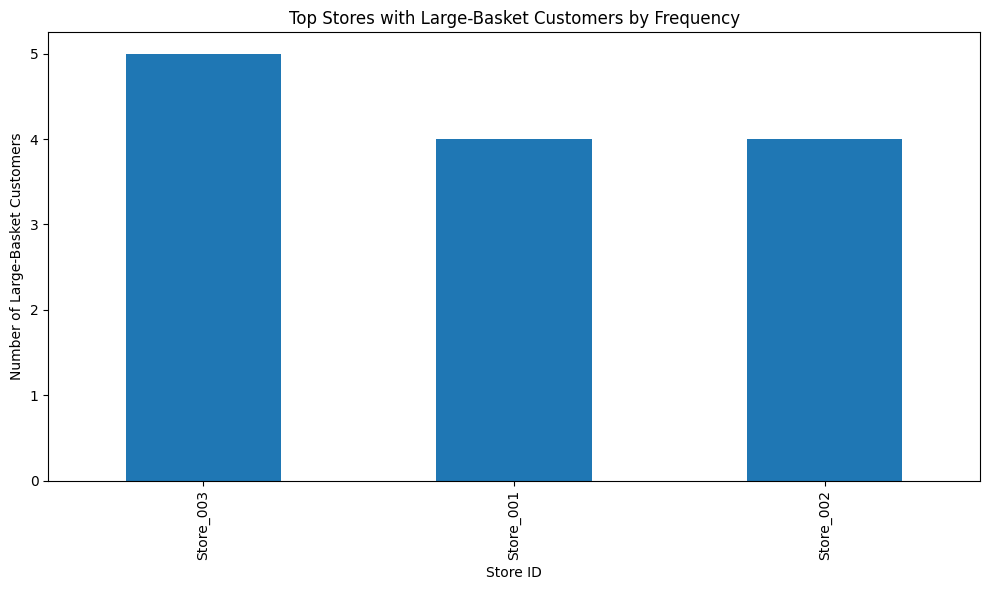


Top Products for Large-Basket Customers:
Product Name
TV            26
Camera        24
Smartphone    23
Tablet        20
Smartwatch    18
Name: count, dtype: int64

Categorical Makeup of Large-Basket Buyers' Baskets:
Product Name
TV            0.194030
Camera        0.179104
Smartphone    0.171642
Tablet        0.149254
Smartwatch    0.134328
Laptop        0.089552
Headphones    0.082090
Name: proportion, dtype: float64


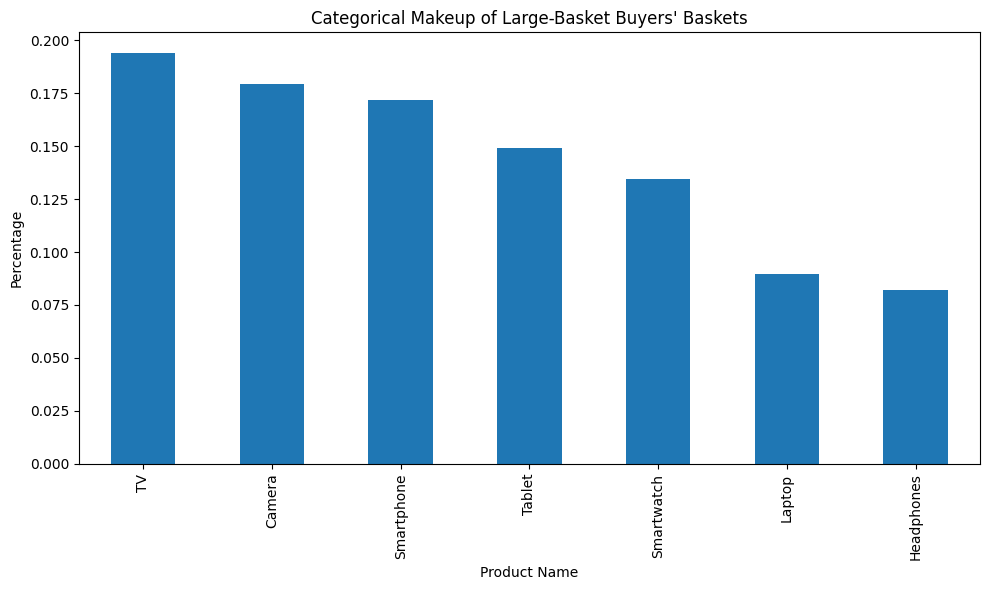

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data (ensure the CSV file exists in your working directory)
sales_df = pd.read_csv("sales_data.csv")

# 1. Most prevalent products in customer baskets
most_prevalent_products = sales_df["Product Name"].value_counts()
print("Most Prevalent Products in Customer Baskets:")
print(most_prevalent_products.head(5))

# 2. Frequency of large buyers (customers with large baskets, e.g., >3 items per order)
basket_sizes = sales_df.groupby(["CustomerID", "OrderID"]).size()
large_basket_buyers = basket_sizes[basket_sizes > 3].reset_index()
large_basket_buyers.columns = ["CustomerID", "OrderID", "BasketSize"]
large_basket_frequencies = large_basket_buyers["CustomerID"].value_counts()
print("\nFrequency of Large Buyers (Customers with Large Baskets):")
print(large_basket_frequencies.head(5))

# 3. Stores containing large-basket buyers
large_basket_store_counts = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])].groupby("StoreID").size()
print("\nStores Containing Large-Basket Buyers:")
print(large_basket_store_counts)

# 4. Visualization of top large-basket customer stores by frequency
large_basket_store_frequencies = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])]
store_customer_frequency = large_basket_store_frequencies.groupby("StoreID")["CustomerID"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_customer_frequency.plot(kind="bar", title="Top Stores with Large-Basket Customers by Frequency")
plt.ylabel("Number of Large-Basket Customers")
plt.xlabel("Store ID")
plt.tight_layout()
plt.show()

# 5. Top-n list of products for large-basket customers
large_basket_products = sales_df[sales_df["CustomerID"].isin(large_basket_buyers["CustomerID"])]
top_products_large_basket = large_basket_products["Product Name"].value_counts()
print("\nTop Products for Large-Basket Customers:")
print(top_products_large_basket.head(5))

# 6. Categorical makeup of large-basket buyers' baskets
categorical_makeup = large_basket_products["Product Name"].value_counts(normalize=True)
print("\nCategorical Makeup of Large-Basket Buyers' Baskets:")
print(categorical_makeup)

# Visualization for item 6: Categorical makeup of their baskets
plt.figure(figsize=(10, 6))
categorical_makeup.plot(kind="bar", title="Categorical Makeup of Large-Basket Buyers' Baskets")
plt.ylabel("Percentage")
plt.xlabel("Product Name")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import random
import os

# Ensure the file is uploaded and present in /content/
csv_path = "/content/sales_data.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"File not found at {csv_path}. Please upload it to Colab or check the path.")

# Load the sales data
df = pd.read_csv(csv_path)

# 1. Analyze the best-selling items for each store
def get_best_selling_item_per_store(df, store_id):
    """
    Returns the best-selling item for a specific store.
    """
    store_data = df[df['StoreID'] == store_id]
    best_selling_item = store_data['Product Name'].value_counts().head(1)
    return best_selling_item

# Check the number of unique stores and sample appropriately
num_stores = min(10, df['StoreID'].nunique())  # Ensure the sample size doesn't exceed the available unique stores
random_stores = random.sample(df['StoreID'].unique().tolist(), num_stores)

# Collect best-selling items for each store
best_selling_items_per_store = []
for store_id in random_stores:
    best_selling_item = get_best_selling_item_per_store(df, store_id)
    best_selling_items_per_store.append((store_id, best_selling_item.index[0], best_selling_item.values[0]))

# Create a DataFrame for best-selling items in stores
best_selling_df = pd.DataFrame(best_selling_items_per_store, columns=['StoreID', 'BestSellingItem', 'SalesCount'])

# Display the top stores with their best-selling items
print("Top Stores with Best-Selling Items:")
print(best_selling_df)

# 2. Analyze the top 10 best-selling items across the entire organization
def get_best_selling_items_across_organization(df):
    """
    Returns the top-selling items across the entire organization.
    """
    best_selling_items = df['Product Name'].value_counts().head(10)
    return best_selling_items

top_selling_items = get_best_selling_items_across_organization(df)
print("\nTop 10 Best-Selling Items Across the Corporation:")
print(top_selling_items)

# 3. Market basket analysis for 10 random stores
baskets_per_store = df.groupby(['StoreID', 'OrderID'])['Product Name'].apply(list)
random_stores_basket = random.sample(baskets_per_store.index.get_level_values(0).unique().tolist(), num_stores)

market_basket_analysis_report = []

for store_id in random_stores_basket:
    transactions = baskets_per_store[store_id].tolist()

    # Apply Transaction Encoder
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    store_df = pd.DataFrame(te_ary, columns=te.columns_)

    # Generate frequent itemsets
    frequent_itemsets = apriori(store_df, min_support=0.05, use_colnames=True)

    # Sort by support
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False).head(5)

    # Append results for the store
    market_basket_analysis_report.append(f"Top 5 Frequent Itemsets for Store {store_id}:\n")
    market_basket_analysis_report.append("=" * 50)
    for idx, row in frequent_itemsets_sorted.iterrows():
        items = ", ".join(row['itemsets'])
        support = round(row['support'] * 100, 2)
        market_basket_analysis_report.append(f"{items} - Purchased together in {support}% of orders.")
    market_basket_analysis_report.append("=" * 50 + "\n")

# Print the market basket analysis report
for line in market_basket_analysis_report:
    print(line)

# 4. Top 10 stores with highest total sales
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)  # Clean and convert price column

# Calculate total sales per store
total_sales_per_order = df.groupby(['StoreID', 'OrderID'])['Price'].sum().reset_index()
total_sales_per_store = total_sales_per_order.groupby('StoreID')['Price'].sum().reset_index()

# Get the top 10 stores by total sales
top_10_stores_by_sales = total_sales_per_store.sort_values(by='Price', ascending=False).head(10)
top_10_stores_by_sales['Rank'] = range(1, len(top_10_stores_by_sales) + 1)

print("\nTop 10 Stores with Highest Total Sales:")
print(top_10_stores_by_sales)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Stores with Best-Selling Items:
     StoreID BestSellingItem  SalesCount
0  Store_003              TV          12
1  Store_001          Tablet          11
2  Store_002      Smartphone          10

Top 10 Best-Selling Items Across the Corporation:
Product Name
TV            28
Camera        26
Smartphone    25
Tablet        21
Smartwatch    20
Headphones    15
Laptop        13
Name: count, dtype: int64
Top 5 Frequent Itemsets for Store Store_003:

TV - Purchased together in 60.0% of orders.
Smartwatch - Purchased together in 53.33% of orders.
Smartphone - Purchased together in 46.67% of orders.
Camera - Purchased together in 33.33% of orders.
Laptop - Purchased together in 33.33% of orders.

Top 5 Frequent Itemsets for Store Store_001:

Camera - Purchased together in 60.0% of orders.
TV - Purchased together in 53.33% of orders.
Tablet - Purchased together in 46.67% of orders.
TV, Camera - Purchased together in 33.33% of orders.
Smartphone - Purchased together in 33.33% of orders.

T